In [1]:
#pip install insightface

In [2]:
#pip install onnxruntime

## Importing Libraries

In [3]:
from matplotlib import pyplot as plt
import cv2
import insightface

## Configure params

In [4]:
providers = ["CPUExecutionProvider"]

## Reading Source Face and Target Frame

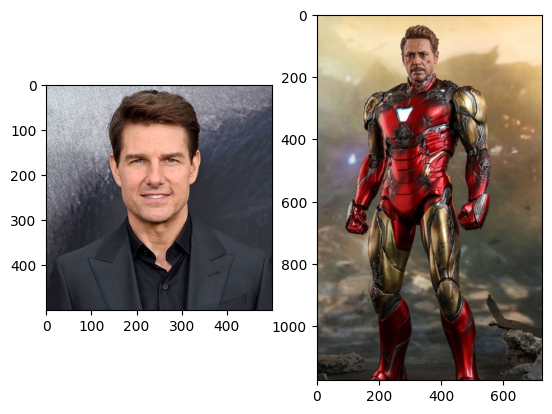

In [5]:
target_frame = cv2.imread('ironman_rd.jpg')
src_frame = cv2.imread("tc.jpg")
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cv2.cvtColor(src_frame, cv2.COLOR_BGR2RGB))
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(cv2.cvtColor(target_frame, cv2.COLOR_BGR2RGB))
plt.show()

## Identify faces

In [6]:
FACE_ANALYSER = insightface.app.FaceAnalysis(
                    name="buffalo_l",
                    root=".", providers=providers,allowed_modules=["landmark_3d_68", "landmark_2d_106","detection","recognition"]
                )
FACE_ANALYSER.prepare(
                ctx_id=0,
                det_size=(640, 640),
            )

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: .\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: .\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: .\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: .\models\buffalo_l\genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: .\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


c:\Users\VIA\AppData\Local\Programs\Python\Python310\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


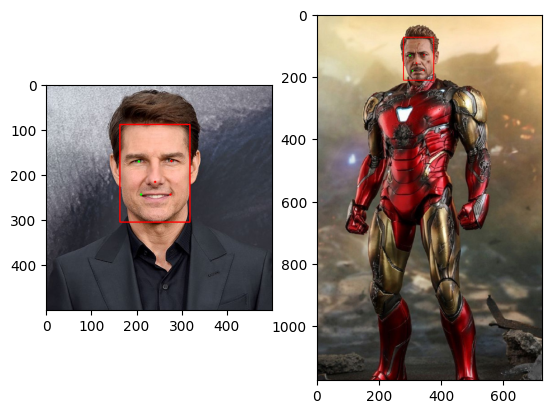

In [7]:
src_faces = FACE_ANALYSER.get(src_frame)
target_faces = FACE_ANALYSER.get(target_frame)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
rimg = FACE_ANALYSER.draw_on(src_frame,src_faces)
ax1.imshow(cv2.cvtColor(rimg, cv2.COLOR_BGR2RGB))
ax1 = fig.add_subplot(1,2,2)
rimg = FACE_ANALYSER.draw_on(target_frame,target_faces)
ax1.imshow(cv2.cvtColor(rimg, cv2.COLOR_BGR2RGB))
plt.show()

## Face Swapper

In [8]:
model_path = './models/inswapper_128.onnx'
model_swap_insightface = insightface.model_zoo.get_model(model_path, providers=providers)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [9]:
img_fake = model_swap_insightface.get(img = target_frame, target_face=FACE_ANALYSER.get(target_frame)[0], source_face=src_faces[0], paste_back=True)

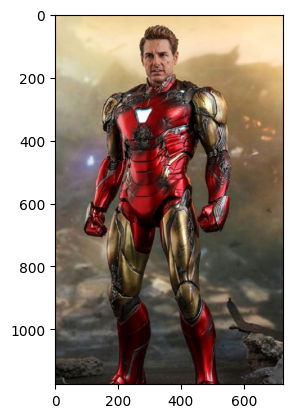

In [10]:
plt.imshow(cv2.cvtColor(img_fake, cv2.COLOR_BGR2RGB))

In [11]:
cv2.imwrite('ironman_is_back.jpg',rimg)

True